# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

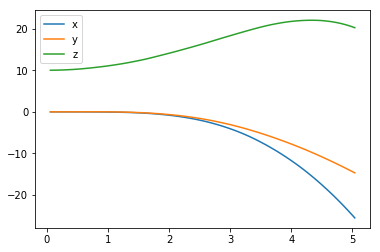

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

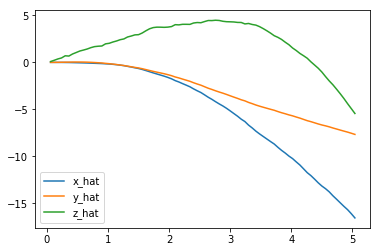

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

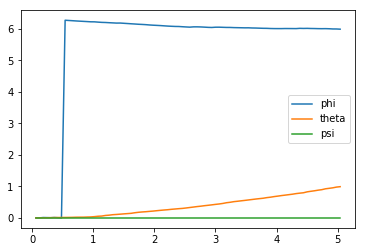

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

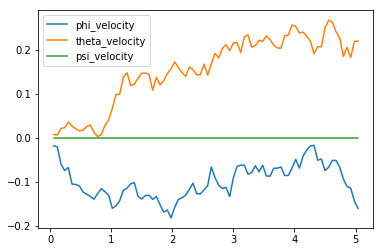

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

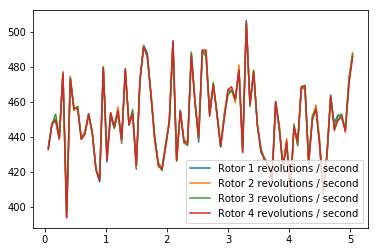

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-25.48675307 -14.66139253  20.22544862   5.99448405   0.99225007   0.        ]
[-16.54656581  -7.66204256  -5.43554226]
[-0.16060549  0.22013887  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   3.000 (best =   3.000), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.actor import Actor
from agents.ddpg import DDPG
import math

from new_task import new_task

num_episodes = 1000
target_pos = np.array([0., 0., 0.])
init_pose = np.array([0.,0.,10., 0., 0., 0.]) 

task = new_task(target_pos=target_pos, init_pose=init_pose)
agent = DDPG(task) 
best_reward = -float("inf")
best_episode_reward = -float("inf")
totalReward = 0

labels = ['episode','cummulative']
results = {x : [] for x in labels}

for i in range(1, num_episodes+1):
    state = agent.reset_episode() 
    best_episode_reward = -float("inf")
    totalReward = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        totalReward += reward
        if reward > best_episode_reward:
            best_episode_reward = reward
        if done:
            if best_episode_reward > best_reward:
                best_reward = best_episode_reward
            to_write = [i] + [totalReward]
            for a in range(len(labels)):
                results[labels[a]].append(to_write[a])
            print("\rEpisode = {:4d} Reward = {:4f} Best Reward = {:4f} Total Reward = {:4f} \n".format(i, best_episode_reward, best_reward, totalReward), task.getPose(), "\n", end="")   # [debug]
            break
    sys.stdout.flush()

Using TensorFlow backend.


Episode =    1 Reward = 0.558020 Best Reward = 0.558020 Total Reward = 2.371767 
 [-0.68186912  0.34096813  0.          0.84651367  4.08754153  0.        ] 
Episode =    2 Reward = 0.300291 Best Reward = 0.558020 Total Reward = 1.533921 
 [ 0.63630277 -1.44237826  0.          0.18360779  5.36877003  0.        ] 
Episode =    3 Reward = 0.313552 Best Reward = 0.558020 Total Reward = 1.719670 
 [-0.06787734  1.25981096  0.          6.11381475  3.85867714  0.        ] 
Episode =    4 Reward = 0.294336 Best Reward = 0.558020 Total Reward = 1.819457 
 [-0.95539679  1.41017966  0.          0.92051414  0.73768391  0.        ] 
Episode =    5 Reward = 0.238220 Best Reward = 0.558020 Total Reward = 1.754394 
 [-0.71033242  2.82515597  0.          2.55782849  6.11941258  0.        ] 
Episode =    6 Reward = 0.408847 Best Reward = 0.558020 Total Reward = 1.699431 
 [-0.57575799  0.8952404   0.          3.94459845  4.84198064  0.        ] 
Episode =    7 Reward = 0.268477 Best Reward = 0.558020 To

Episode =   54 Reward = 0.277193 Best Reward = 0.916382 Total Reward = 1.682491 
 [-3.85503244  1.14386765  0.          4.99234982  0.30916347  0.        ] 
Episode =   55 Reward = 0.674754 Best Reward = 0.916382 Total Reward = 1.567806 
 [ 0.05382131 -1.27915004  0.          1.64028182  0.34116227  0.        ] 
Episode =   56 Reward = 0.228019 Best Reward = 0.916382 Total Reward = 1.711405 
 [-0.86335087  1.83895376  0.          0.60586872  1.89343301  0.        ] 
Episode =   57 Reward = 0.155485 Best Reward = 0.916382 Total Reward = 1.159212 
 [-8.50419301 -0.60255417  0.          4.26674732  5.75258091  0.        ] 
Episode =   58 Reward = 0.292177 Best Reward = 0.916382 Total Reward = 1.305984 
 [-6.51681537 -1.05449122  0.          1.87653365  4.17636745  0.        ] 
Episode =   59 Reward = 0.187554 Best Reward = 0.916382 Total Reward = 1.275227 
 [-2.00498745  1.03546255  0.          3.18871825  1.6390936   0.        ] 
Episode =   60 Reward = 0.157091 Best Reward = 0.916382 To

Episode =  106 Reward = 0.172485 Best Reward = 0.916382 Total Reward = 2.510734 
 [-8.29755319 -5.42815288  0.          5.8954574   3.89021251  0.        ] 
Episode =  107 Reward = 0.216125 Best Reward = 0.916382 Total Reward = 2.387885 
 [-3.05718497 -0.82156538  0.          0.2772056   0.65499079  0.        ] 
Episode =  108 Reward = 0.168635 Best Reward = 0.916382 Total Reward = 2.171786 
 [-4.53620058 -2.08161496  0.          5.99118866  4.9557715   0.        ] 
Episode =  109 Reward = 0.184943 Best Reward = 0.916382 Total Reward = 1.845142 
 [-3.4876335  -1.24930904  0.          0.35316949  2.15930482  0.        ] 
Episode =  110 Reward = 0.174656 Best Reward = 0.916382 Total Reward = 2.469293 
 [-4.9440546   0.7158381   0.          0.05181354  1.12203398  0.        ] 
Episode =  111 Reward = 0.199414 Best Reward = 0.916382 Total Reward = 2.015268 
 [-2.54246692 -1.08090154  0.          1.14098525  2.42056     0.        ] 
Episode =  112 Reward = 0.203582 Best Reward = 0.916382 To

Episode =  158 Reward = 0.252196 Best Reward = 0.916382 Total Reward = 3.122862 
 [-4.13798397 -0.62633766  0.          3.3312402   0.74468685  0.        ] 
Episode =  159 Reward = 0.394096 Best Reward = 0.916382 Total Reward = 3.696984 
 [-2.91555641 -0.46909065  0.          3.27790984  0.36845587  0.        ] 
Episode =  160 Reward = 0.237201 Best Reward = 0.916382 Total Reward = 3.365725 
 [-3.85094383 -4.82198597  0.          1.53524026  0.41016082  0.        ] 
Episode =  161 Reward = 0.295812 Best Reward = 0.916382 Total Reward = 3.431668 
 [-2.74861767 -2.61713635  0.          2.33392024  0.37502117  0.        ] 
Episode =  162 Reward = 0.323570 Best Reward = 0.916382 Total Reward = 3.054818 
 [-2.12000461 -3.95151378  0.          4.1998365   0.29146263  0.        ] 
Episode =  163 Reward = 0.533468 Best Reward = 0.916382 Total Reward = 4.552737 
 [-1.936086    0.09362485  0.          3.8590133   0.24758175  0.        ] 
Episode =  164 Reward = 0.308742 Best Reward = 0.916382 To

Episode =  210 Reward = 0.927650 Best Reward = 0.959946 Total Reward = 5.152739 
 [-0.63906876  0.43950257  0.          1.07784263  0.14015281  0.        ] 
Episode =  211 Reward = 0.666231 Best Reward = 0.959946 Total Reward = 4.705101 
 [-0.5462703   0.49273019  0.          1.64984575  0.12075744  0.        ] 
Episode =  212 Reward = 0.899878 Best Reward = 0.959946 Total Reward = 5.378179 
 [-0.80630377  0.04439415  0.          0.36136379  0.1861333   0.        ] 
Episode =  213 Reward = 0.420985 Best Reward = 0.959946 Total Reward = 4.267897 
 [-0.86030682 -0.42363677  0.          5.50647395  0.12488209  0.        ] 
Episode =  214 Reward = 0.374863 Best Reward = 0.959946 Total Reward = 3.826673 
 [-0.67528059 -3.09521686  0.          0.91267415  0.1828931   0.        ] 
Episode =  215 Reward = 0.482256 Best Reward = 0.959946 Total Reward = 4.248141 
 [-0.5812182  -2.45361976  0.          1.41922155  0.23059043  0.        ] 
Episode =  216 Reward = 0.532501 Best Reward = 0.959946 To

Episode =  263 Reward = 1.381747 Best Reward = 1.665772 Total Reward = 7.394192 
 [-0.03205327  0.47808062  0.          0.04793013  0.02275498  0.        ] 
Episode =  264 Reward = 0.945226 Best Reward = 1.665772 Total Reward = 5.471241 
 [-0.01295068  1.14010174  0.          0.29257466  0.01460128  0.        ] 
Episode =  265 Reward = 0.800515 Best Reward = 1.665772 Total Reward = 5.019892 
 [-0.02960894 -1.53718677  0.          4.35957648  0.01709084  0.        ] 
Episode =  266 Reward = 0.827875 Best Reward = 1.665772 Total Reward = 4.050919 
 [-0.01266722 -0.56057672  0.          1.23260437  0.01345118  0.        ] 
Episode =  267 Reward = 1.171759 Best Reward = 1.665772 Total Reward = 5.170467 
 [-0.00903567  0.76290424  0.          4.51976654  0.01188257  0.        ] 
Episode =  268 Reward = 0.653795 Best Reward = 1.665772 Total Reward = 4.643016 
 [-0.02034498 -1.37489706  0.          0.29520656  0.01235221  0.        ] 
Episode =  269 Reward = 0.895416 Best Reward = 1.665772 To

Episode =  313 Reward = 0.527248 Best Reward = 1.665772 Total Reward = 4.097964 
 [ -6.43318368e-04   1.80305253e+00   0.00000000e+00   5.95078436e+00
   1.32011755e-03   0.00000000e+00] 
Episode =  314 Reward = 0.573284 Best Reward = 1.665772 Total Reward = 4.398256 
 [ -2.23197006e-03   2.79376681e+00   0.00000000e+00   6.12910721e-01
   2.92895187e-03   0.00000000e+00] 
Episode =  315 Reward = 0.887177 Best Reward = 1.665772 Total Reward = 6.013923 
 [ -1.69727948e-03  -6.90437709e-01   0.00000000e+00   4.63481192e+00
   1.72022691e-03   0.00000000e+00] 
Episode =  316 Reward = 1.121246 Best Reward = 1.665772 Total Reward = 6.495281 
 [-0.00144512 -0.72228848  0.          0.62816851  0.00190096  0.        ] 
Episode =  317 Reward = 0.677820 Best Reward = 1.665772 Total Reward = 4.025240 
 [-0.00170891  1.11536139  0.          1.33453839  0.0016517   0.        ] 
Episode =  318 Reward = 0.927093 Best Reward = 1.665772 Total Reward = 4.946029 
 [ -5.28174221e-04   1.27833063e+00   0.0

Episode =  358 Reward = 0.551833 Best Reward = 1.866301 Total Reward = 4.593467 
 [ -1.06234193e-03   2.35727623e+00   0.00000000e+00   9.46197620e-01
   1.26382591e-03   0.00000000e+00] 
Episode =  359 Reward = 0.725435 Best Reward = 1.866301 Total Reward = 3.912586 
 [ -1.32947082e-04  -4.90698700e-02   0.00000000e+00   9.12606176e-01
   3.67330883e-04   0.00000000e+00] 
Episode =  360 Reward = 0.354443 Best Reward = 1.866301 Total Reward = 4.127718 
 [ -2.79984480e-04   3.03926573e+00   0.00000000e+00   4.02427288e+00
   5.11742697e-04   0.00000000e+00] 
Episode =  361 Reward = 0.727060 Best Reward = 1.866301 Total Reward = 5.432934 
 [ -6.82699260e-04   1.11382131e+00   0.00000000e+00   1.62999594e+00
   1.00033126e-03   0.00000000e+00] 
Episode =  362 Reward = 0.623494 Best Reward = 1.866301 Total Reward = 4.898606 
 [ -7.97394353e-03   8.51219689e-01   0.00000000e+00   4.87572018e+00
   2.88665281e-03   0.00000000e+00] 
Episode =  363 Reward = 0.505448 Best Reward = 1.866301 Tota

Episode =  403 Reward = 0.484698 Best Reward = 1.866301 Total Reward = 4.231558 
 [ -3.51596322e-04   2.60884804e+00   0.00000000e+00   3.47824799e-01
   2.61076850e-04   0.00000000e+00] 
Episode =  404 Reward = 1.019984 Best Reward = 1.866301 Total Reward = 5.252454 
 [-0.01234427 -0.74287943  0.          0.76808883  0.01608839  0.        ] 
Episode =  405 Reward = 0.768360 Best Reward = 1.866301 Total Reward = 3.990035 
 [ -2.50896189e-05  -2.14347553e+00   0.00000000e+00   5.68122825e+00
   4.24502599e-05   0.00000000e+00] 
Episode =  406 Reward = 0.889942 Best Reward = 1.866301 Total Reward = 5.450836 
 [ -1.78395812e-03  -2.60622082e-01   0.00000000e+00   4.74250557e+00
   4.29855292e-04   0.00000000e+00] 
Episode =  407 Reward = 0.692226 Best Reward = 1.866301 Total Reward = 4.605726 
 [ -7.47615352e-04  -1.87782119e+00   0.00000000e+00   3.83452928e-01
   4.52685719e-04   0.00000000e+00] 
Episode =  408 Reward = 1.671220 Best Reward = 1.866301 Total Reward = 6.584889 
 [ -1.2331

Episode =  448 Reward = 1.094780 Best Reward = 1.866301 Total Reward = 5.832176 
 [ -3.27795324e-03   2.00785258e-01   0.00000000e+00   5.07149757e+00
   8.78750508e-04   0.00000000e+00] 
Episode =  449 Reward = 1.230706 Best Reward = 1.866301 Total Reward = 5.577388 
 [-0.02510904 -0.59917355  0.          4.18211522  0.01824798  0.        ] 
Episode =  450 Reward = 1.737604 Best Reward = 1.866301 Total Reward = 6.345669 
 [ -7.35303553e-05  -2.62111908e-02   0.00000000e+00   3.89429332e+00
   4.77668495e-05   0.00000000e+00] 
Episode =  451 Reward = 0.736124 Best Reward = 1.866301 Total Reward = 4.693098 
 [ -2.35443335e-04   1.60892926e+00   0.00000000e+00   3.31394200e+00
   1.12558777e-04   0.00000000e+00] 
Episode =  452 Reward = 0.711857 Best Reward = 1.866301 Total Reward = 5.477758 
 [ -1.37743737e-04  -1.57434963e+00   0.00000000e+00   7.76838553e-01
   8.43375576e-05   0.00000000e+00] 
Episode =  453 Reward = 1.201407 Best Reward = 1.866301 Total Reward = 4.908233 
 [ -1.2239

Episode =  495 Reward = 0.628293 Best Reward = 1.866301 Total Reward = 4.102075 
 [-0.11997976  1.76760258  0.          4.96012106  0.03228122  0.        ] 
Episode =  496 Reward = 1.110169 Best Reward = 1.866301 Total Reward = 5.180857 
 [ -7.22919204e-05  -8.95282676e-01   0.00000000e+00   5.47018016e+00
   3.30840876e-04   0.00000000e+00] 
Episode =  497 Reward = 1.164618 Best Reward = 1.866301 Total Reward = 5.603647 
 [ -1.62313481e-04  -7.39451318e-01   0.00000000e+00   3.23413967e+00
   4.61179604e-04   0.00000000e+00] 
Episode =  498 Reward = 0.801805 Best Reward = 1.866301 Total Reward = 4.660188 
 [ -7.83537004e-05   1.45894074e+00   0.00000000e+00   9.97832519e-01
   1.99298244e-04   0.00000000e+00] 
Episode =  499 Reward = 0.694864 Best Reward = 1.866301 Total Reward = 5.060092 
 [ -3.43256931e-04   8.72336555e-01   0.00000000e+00   1.40170485e+00
   3.21445182e-04   0.00000000e+00] 
Episode =  500 Reward = 1.244348 Best Reward = 1.866301 Total Reward = 5.569760 
 [ -4.8532

Episode =  541 Reward = 0.135676 Best Reward = 1.866301 Total Reward = 1.124384 
 [-6.90367758  0.39099204  0.          0.32175432  4.30769233  0.        ] 
Episode =  542 Reward = 0.118741 Best Reward = 1.866301 Total Reward = 0.470645 
 [-10.75998204   1.02479347   0.           3.71410871   0.42340423   0.        ] 
Episode =  543 Reward = 1.066736 Best Reward = 1.866301 Total Reward = 5.309575 
 [ -1.14048007e-04  -7.51560516e-01   0.00000000e+00   2.74302063e+00
   3.15860915e-03   0.00000000e+00] 
Episode =  544 Reward = 1.094701 Best Reward = 1.866301 Total Reward = 5.157280 
 [ -1.62613112e-04  -4.96381667e-01   0.00000000e+00   5.77680282e+00
   6.18498933e-05   0.00000000e+00] 
Episode =  545 Reward = 0.122053 Best Reward = 1.866301 Total Reward = 1.097600 
 [-7.37342517 -0.21319253  0.          2.58064273  0.01356853  0.        ] 
Episode =  546 Reward = 0.210971 Best Reward = 1.866301 Total Reward = 1.507436 
 [ 0.20520775 -0.64259192  0.          4.28054383  3.69226776  0. 

Episode =  589 Reward = 1.362255 Best Reward = 1.866301 Total Reward = 6.325637 
 [ -8.27166372e-05  -8.29675879e-02   0.00000000e+00   4.38712553e+00
   2.43898018e-04   0.00000000e+00] 
Episode =  590 Reward = 0.921049 Best Reward = 1.866301 Total Reward = 5.017479 
 [ -2.00051309e-05   8.81014668e-01   0.00000000e+00   2.70991372e+00
   2.12264992e-04   0.00000000e+00] 
Episode =  591 Reward = 0.556366 Best Reward = 1.866301 Total Reward = 4.494867 
 [ -6.62701352e-05   1.70308915e+00   0.00000000e+00   1.66842266e+00
   2.13884442e-05   0.00000000e+00] 
Episode =  592 Reward = 0.538486 Best Reward = 1.866301 Total Reward = 4.538720 
 [ -7.08202288e-05   1.52363881e+00   0.00000000e+00   4.60226297e+00
   6.65855379e-05   0.00000000e+00] 
Episode =  593 Reward = 0.663826 Best Reward = 1.866301 Total Reward = 4.039527 
 [ -1.37466452e-04  -2.01495097e+00   0.00000000e+00   5.40088133e+00
   4.54797357e-03   0.00000000e+00] 
Episode =  594 Reward = 1.413125 Best Reward = 1.866301 Tota

Episode =  633 Reward = 1.102232 Best Reward = 1.866301 Total Reward = 4.963942 
 [ -1.17944054e-03  -4.01030593e-01   0.00000000e+00   5.52872764e+00
   2.34961523e-03   0.00000000e+00] 
Episode =  634 Reward = 0.736012 Best Reward = 1.866301 Total Reward = 4.769137 
 [ -2.06235111e-03  -1.60404760e+00   0.00000000e+00   2.93780944e+00
   1.16708433e-02   0.00000000e+00] 
Episode =  635 Reward = 0.953559 Best Reward = 1.866301 Total Reward = 5.071357 
 [ -2.22248039e-03   9.56785737e-01   0.00000000e+00   5.18978930e+00
   3.71083516e-03   0.00000000e+00] 
Episode =  636 Reward = 0.638189 Best Reward = 1.866301 Total Reward = 4.658029 
 [ -1.21187350e-03  -1.37413877e+00   0.00000000e+00   5.07796227e+00
   6.18751332e-03   0.00000000e+00] 
Episode =  637 Reward = 0.840611 Best Reward = 1.866301 Total Reward = 5.374275 
 [-0.00208386 -0.58116408  0.          1.48900754  0.0044382   0.        ] 
Episode =  638 Reward = 1.252544 Best Reward = 1.866301 Total Reward = 5.556642 
 [ -1.6660

Episode =  679 Reward = 1.322555 Best Reward = 1.866301 Total Reward = 5.782173 
 [ -1.48826991e-03   1.78429439e-01   0.00000000e+00   1.94405675e+00
   1.65420462e-03   0.00000000e+00] 
Episode =  680 Reward = 0.710105 Best Reward = 1.866301 Total Reward = 4.565629 
 [ -6.12730727e-04  -1.68767269e+00   0.00000000e+00   5.19816922e+00
   1.18437123e-03   0.00000000e+00] 
Episode =  681 Reward = 1.011434 Best Reward = 1.866301 Total Reward = 5.427479 
 [ -1.65664089e-03   9.80302957e-01   0.00000000e+00   2.55407062e+00
   1.65547022e-03   0.00000000e+00] 
Episode =  682 Reward = 1.471831 Best Reward = 1.866301 Total Reward = 6.298744 
 [-0.00165799  0.04014485  0.          1.11829004  0.00178926  0.        ] 
Episode =  683 Reward = 0.965515 Best Reward = 1.866301 Total Reward = 5.100074 
 [ -1.91209233e-03  -2.36079772e-01   0.00000000e+00   2.62450982e+00
   1.87293743e-03   0.00000000e+00] 
Episode =  684 Reward = 1.290205 Best Reward = 1.866301 Total Reward = 5.937585 
 [ -1.1872

Episode =  725 Reward = 1.530524 Best Reward = 1.866301 Total Reward = 5.594231 
 [ -4.24633789e-04  -4.53467585e-01   0.00000000e+00   6.82895894e-01
   4.99415900e-04   0.00000000e+00] 
Episode =  726 Reward = 1.221748 Best Reward = 1.866301 Total Reward = 5.760208 
 [ -2.19255289e-04   3.97641493e-01   0.00000000e+00   1.98077172e+00
   3.61922932e-04   0.00000000e+00] 
Episode =  727 Reward = 0.827751 Best Reward = 1.866301 Total Reward = 5.540502 
 [ -4.08723381e-04   6.78257946e-01   0.00000000e+00   1.55847640e+00
   6.65250545e-04   0.00000000e+00] 
Episode =  728 Reward = 0.992540 Best Reward = 1.866301 Total Reward = 5.704699 
 [ -3.95269571e-04   6.83432256e-01   0.00000000e+00   6.16297139e+00
   7.14918667e-04   0.00000000e+00] 
Episode =  729 Reward = 0.963497 Best Reward = 1.866301 Total Reward = 4.647094 
 [ -6.44153851e-04   7.15325737e-01   0.00000000e+00   5.16463835e+00
   6.26952634e-04   0.00000000e+00] 
Episode =  730 Reward = 1.034539 Best Reward = 1.866301 Tota

Episode =  769 Reward = 0.948911 Best Reward = 1.866301 Total Reward = 5.891514 
 [ -6.87404993e-04   5.32998582e-01   0.00000000e+00   6.07894920e+00
   4.26097821e-04   0.00000000e+00] 
Episode =  770 Reward = 1.171916 Best Reward = 1.866301 Total Reward = 5.237235 
 [ -1.00860721e-04   1.47185364e-01   0.00000000e+00   2.41464964e+00
   1.15335671e-04   0.00000000e+00] 
Episode =  771 Reward = 1.423030 Best Reward = 1.866301 Total Reward = 5.727011 
 [ -4.04362120e-05   3.78676771e-01   0.00000000e+00   7.00758574e-02
   2.17564417e-05   0.00000000e+00] 
Episode =  772 Reward = 0.890876 Best Reward = 1.866301 Total Reward = 5.102258 
 [ -1.96830622e-04   9.36228887e-01   0.00000000e+00   2.63561102e+00
   1.55390866e-04   0.00000000e+00] 
Episode =  773 Reward = 1.068457 Best Reward = 1.866301 Total Reward = 5.421964 
 [ -2.33771666e-04  -9.50892418e-02   0.00000000e+00   2.59380489e+00
   1.70394570e-04   0.00000000e+00] 
Episode =  774 Reward = 0.954375 Best Reward = 1.866301 Tota

Episode =  813 Reward = 1.413923 Best Reward = 1.866301 Total Reward = 6.039955 
 [ -1.04607687e-04  -2.67334895e-01   0.00000000e+00   4.31702272e+00
   4.43093770e-05   0.00000000e+00] 
Episode =  814 Reward = 1.380859 Best Reward = 1.866301 Total Reward = 5.415165 
 [ -2.74204810e-04   4.32947876e-01   0.00000000e+00   8.27726491e-01
   1.21776791e-04   0.00000000e+00] 
Episode =  815 Reward = 0.714809 Best Reward = 1.866301 Total Reward = 4.561802 
 [ -1.27279862e-04   1.68912154e+00   0.00000000e+00   2.56558340e+00
   1.19332140e-04   0.00000000e+00] 
Episode =  816 Reward = 1.037428 Best Reward = 1.866301 Total Reward = 4.828557 
 [ -9.61395461e-06  -1.72959427e-01   0.00000000e+00   2.90611864e+00
   1.69692912e-05   0.00000000e+00] 
Episode =  817 Reward = 1.503891 Best Reward = 1.866301 Total Reward = 5.600450 
 [ -2.04314967e-05  -3.44168453e-01   0.00000000e+00   8.78589459e-01
   3.29406211e-05   0.00000000e+00] 
Episode =  818 Reward = 0.954706 Best Reward = 1.866301 Tota

Episode =  857 Reward = 0.463317 Best Reward = 1.866301 Total Reward = 3.643130 
 [ -1.18440772e-04  -2.79385041e+00   0.00000000e+00   2.16317253e+00
   6.95786668e-05   0.00000000e+00] 
Episode =  858 Reward = 0.618533 Best Reward = 1.866301 Total Reward = 4.263115 
 [ -2.88104193e-05   1.63757771e+00   0.00000000e+00   5.09494487e+00
   1.17716078e-05   0.00000000e+00] 
Episode =  859 Reward = 0.754896 Best Reward = 1.866301 Total Reward = 4.851158 
 [ -3.88151421e-05   6.99054157e-01   0.00000000e+00   1.62298800e+00
   6.06929886e-05   0.00000000e+00] 
Episode =  860 Reward = 0.748673 Best Reward = 1.866301 Total Reward = 4.743097 
 [ -1.83771825e-04   1.05039893e+00   0.00000000e+00   8.57731448e-01
   6.49183151e-05   0.00000000e+00] 
Episode =  861 Reward = 0.326036 Best Reward = 1.866301 Total Reward = 2.648880 
 [ -5.35429702e-05   7.63050457e+00   0.00000000e+00   5.81778782e+00
   1.41793649e-05   0.00000000e+00] 
Episode =  862 Reward = 1.802405 Best Reward = 1.866301 Tota

Episode =  901 Reward = 0.295154 Best Reward = 1.866301 Total Reward = 2.581195 
 [ -2.77843467e-05   1.15484010e+01   0.00000000e+00   2.14876898e+00
   1.53605636e-05   0.00000000e+00] 
Episode =  902 Reward = 0.256104 Best Reward = 1.866301 Total Reward = 2.255896 
 [ -7.46803009e-05   1.33364283e+01   0.00000000e+00   1.47612154e+00
   4.53752152e-05   0.00000000e+00] 
Episode =  903 Reward = 0.259001 Best Reward = 1.866301 Total Reward = 2.218657 
 [ -1.19278292e-05   1.47430402e+01   0.00000000e+00   1.35277412e+00
   4.52519644e-07   0.00000000e+00] 
Episode =  904 Reward = 0.258389 Best Reward = 1.866301 Total Reward = 1.435135 
 [ -3.15922200e-04   3.74323672e+01   0.00000000e+00   2.66707973e+00
   8.14731784e-05   0.00000000e+00] 
Episode =  905 Reward = 0.265678 Best Reward = 1.866301 Total Reward = 2.575227 
 [  1.20835912e-03   2.42050999e+01   0.00000000e+00   3.63215054e+00
   6.28293869e+00   0.00000000e+00] 
Episode =  906 Reward = 0.266484 Best Reward = 1.866301 Tota

Episode =  945 Reward = 0.279276 Best Reward = 1.866301 Total Reward = 2.442288 
 [-49.70549482  61.76479977   3.03616443   2.23344007   0.99674211   0.        ] 
Episode =  946 Reward = 0.280722 Best Reward = 1.866301 Total Reward = 1.558597 
 [-58.35550887  32.0931866    0.           3.46600471   3.98450906   0.        ] 
Episode =  947 Reward = 0.279759 Best Reward = 1.866301 Total Reward = 1.264157 
 [-54.16691853  25.16326699   0.           2.57036168   0.09038161   0.        ] 
Episode =  948 Reward = 0.279926 Best Reward = 1.866301 Total Reward = 0.845137 
 [-44.83953307  11.38070079   0.           2.69071404   2.68214838   0.        ] 
Episode =  949 Reward = 0.279110 Best Reward = 1.866301 Total Reward = 3.753563 
 [ -2.40231293e-03   7.62811089e+01   2.52074521e+01   1.69841852e+00
   7.44370410e-04   0.00000000e+00] 
Episode =  950 Reward = 0.280244 Best Reward = 1.866301 Total Reward = 0.365006 
 [-24.95238876  -0.75711835   0.           1.90151043   0.57374386   0.        

Episode =  990 Reward = 0.237786 Best Reward = 1.866301 Total Reward = 2.489363 
 [ -1.27622494e-03   1.49829214e+01   0.00000000e+00   5.96644496e+00
   7.63146278e-04   0.00000000e+00] 
Episode =  991 Reward = 0.242038 Best Reward = 1.866301 Total Reward = 2.656282 
 [ -1.63868357e-03   2.10634347e+01   0.00000000e+00   3.84561595e+00
   2.94868565e-03   0.00000000e+00] 
Episode =  992 Reward = 0.244785 Best Reward = 1.866301 Total Reward = 2.672413 
 [ -2.21646937e-03   1.96666558e+01   0.00000000e+00   3.90015885e+00
   2.28844610e-03   0.00000000e+00] 
Episode =  993 Reward = 0.235751 Best Reward = 1.866301 Total Reward = 2.569101 
 [ -2.64507830e-03   1.84287420e+01   0.00000000e+00   4.15871237e+00
   2.77403449e-03   0.00000000e+00] 
Episode =  994 Reward = 0.242187 Best Reward = 1.866301 Total Reward = 2.200936 
 [ -1.14096816e-03   2.84976209e+01   0.00000000e+00   3.32989604e+00
   4.97392262e-03   0.00000000e+00] 
Episode =  995 Reward = 0.238650 Best Reward = 1.866301 Tota

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

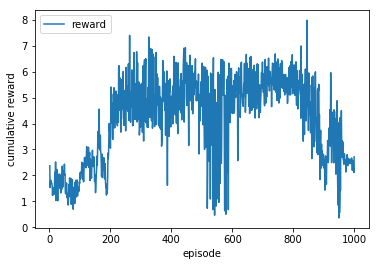

In [11]:
## TODO: Plot the rewards.

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['cummulative'], label='reward')
plt.xlabel('episode')
plt.ylabel('cumulative reward')
plt.legend()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

I worked on z axis of the quadcopter . I have implemented a landing task where the quadcopter begins at a specific height and the target point is at the ground . In the reward function , I take the sum of the absolute difference between the current pose and the goal, multiply it by -0.3 then subtract it from 1. if the result is -ve it would return -1 and if positive it would return 1.



**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I have used template provided of Actor-Critic method .
In the DDPG template , I had made changes to theta to 0.085 , gamma to 0.70 and alpha to 0.15 .
I used 3 layers of sizes (32, 64, 32) along with BatchNormalization, Dropout - 0.2 and Relu Activation 


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

It was a hard task to learn. I think setting up the reward function was the important part .
Hyperparameters were required to be tuned multiple times . The final performance of the agent is shown below.

In [12]:
#Final Peformance 

last_mean = np.mean(results['cummulative'][-10:])
print("Mean rewards over the last 10 episodes: ",last_mean)


Mean rewards over the last 10 episodes:  2.47956535158


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

Initially I was confused whether to go for DQN approach or with Actor-critic method . Then I tried Actor-Critic method . Setting up the reward function was the hardest part .
The content of the course was not easy to understand and it took lot more time then is specified for each course. I am intersted in playing around with other parameters of the quadcopter like wind speed impact, moving at angles ,changing speed.